<IPython.core.display.Javascript object>


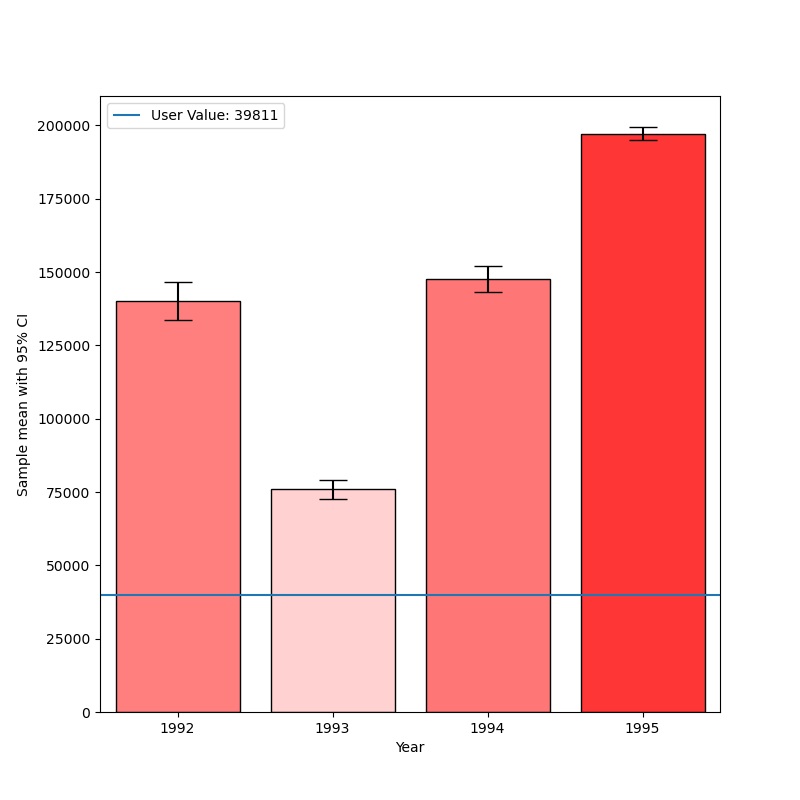

9


In [6]:
# Use the following data for this assignment:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as cm
import math


np.random.seed(1233)

df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                  index=[1992,1993,1994,1995])

SE = df.sem(axis=1).tolist()

plt.figure(figsize=(8,8))

def color_bars(uv):
    
    for i in range(len(df)):
        mu = df[i].mean()
        denom = 200000
        shade = (abs(mu - uv) / denom)
        top = mu + SE[i]*1.96
        
        if uv == mu:
            plt.bar(i,mu,color='white',edgecolor='black',yerr=SE[i]*1.96,capsize=10)
        if uv < mu:
            plt.bar(i,mu,color=[1,0,0,shade],edgecolor='black',yerr=SE[i]*1.96,capsize=10)
        else:
            plt.bar(i,mu,color=[0,0,1,shade],edgecolor='black',yerr=SE[i]*1.96,capsize=10)
        plt.xlabel("Year")
        plt.ylabel("Sample mean with 95% CI")

plt.xticks([0,1,2,3],['1992','1993','1994','1995'])
color_bars(0)
plt.xlim((-.5,3.5))
plt.ylim((0,210000))


def on_press(event):
    plt.gcf().canvas.mpl_disconnect(event)
    print(event.inaxes)
    #plt.gcf().canvas.mpl_connect('button_press_event')
    plt.cla()
    plt.gca()
    plt.xlim((-.5,3.5))
    plt.ylim((0,210000))
    user_value = math.floor(event.ydata)
    

    
    plt.hlines(user_value, -.5, 3.5, label = "User Value: {}".format(user_value, event.ydata))
    plt.legend()
    
    color_bars(user_value)
    plt.xticks([0,1,2,3],['1992','1993','1994','1995'])
    plt.xlabel("Year")
    plt.ylabel("Sample mean with 95% CI")
    
baby = plt.gcf().canvas.mpl_connect('button_press_event',on_press)
print(baby)